In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#to see the correleation of the columns ex:how the price is affected based on bedrooms,bathrooms etc,sqft_living affects it most.

df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [6]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

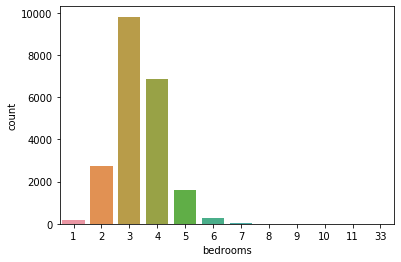

In [7]:
sns.countplot(df['bedrooms'])

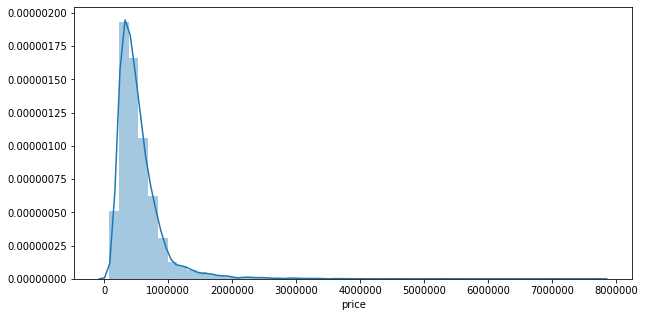

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(df['price'])

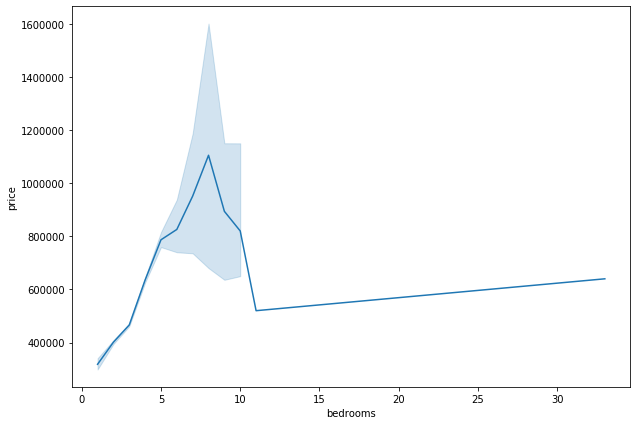

In [9]:
plt.figure(figsize=(10,7))
sns.lineplot(x=df['bedrooms'],y=df['price'])

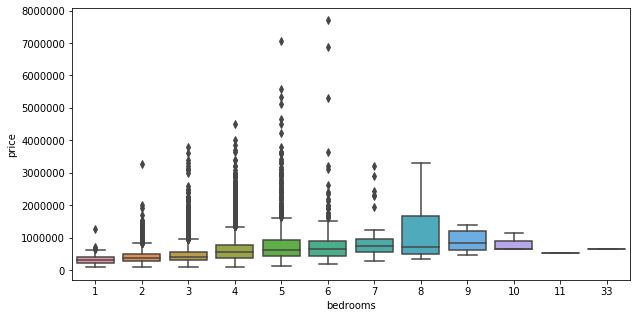

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['bedrooms'],y=df['price'])

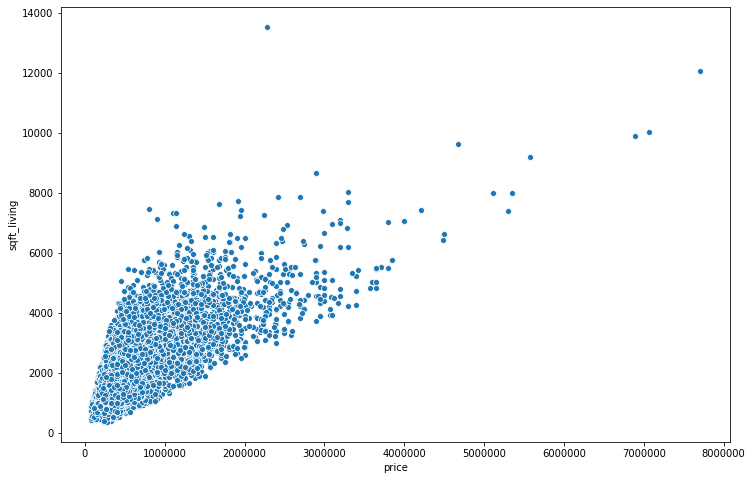

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(y=df['sqft_living'],x=df['price'])

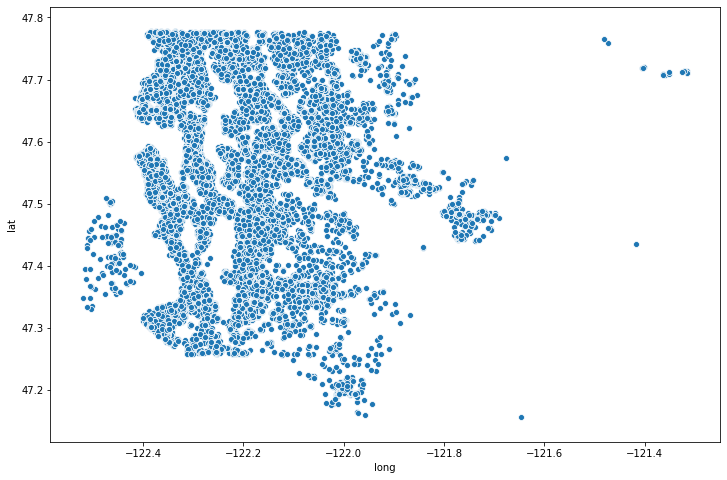

In [12]:
# by latitiude and longitude
##the scatterplot for this gives the outline of king county in usa
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['long'],y=df['lat'])

In [13]:
## to get rid of the outliers ie high prices like 7mil,6mil which are few and far in between so that the model is trained effectively
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [14]:
len(df)*0.01

215.97

In [15]:
df2 = df.sort_values('price',ascending=False)[216:]

In [16]:
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


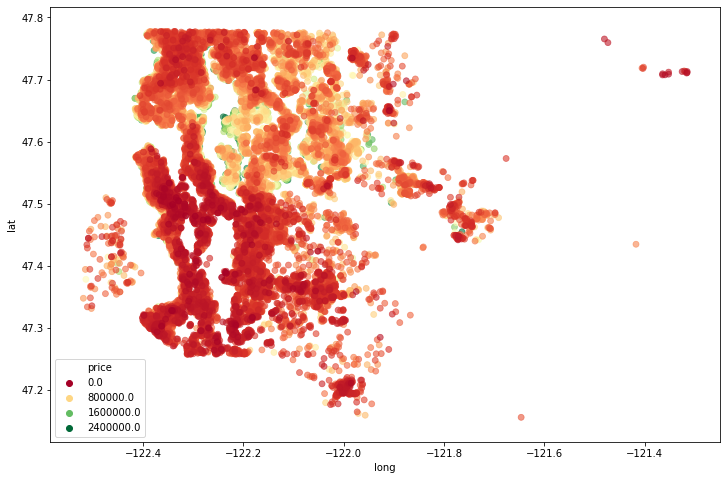

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df2['long'],y=df2['lat'],hue=df2['price'],alpha=0.6,edgecolor=None,palette='RdYlGn')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [19]:
df = df.drop('id',axis=1)

In [20]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [21]:
# drop the zipcode as well.we could use it with domain knowledege ie real estate but too many counts to classify
# ie 602 houses in zipcode 98103 like that 70 houses(creating 70 columns!)
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [22]:
df = df.drop('zipcode',axis=1)

In [23]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [24]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [25]:
df['date'] = pd.to_datetime(df['date'])

In [26]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [27]:
df['month'] = df['date'].apply(lambda date: date.month)

In [28]:
df['year'] = df['date'].apply(lambda date:date.year)

In [29]:
df = df.drop('date',axis=1)

In [30]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,5,2014
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2,2015
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,6,2014
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,1,2015


In [31]:
df['month'].value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month, dtype: int64

In [32]:
#groupby is used to check how the columns vary with unique individual values(here months)
df.groupby('month').mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
month,,,,,,,,,,,,,,,,,,,
1,525963.251534,3.387526,2.129346,2085.094070,17869.721881,1.478528,0.008180,0.246421,3.347648,7.642127,1814.019427,271.074642,1971.749489,73.433538,47.553500,-122.212188,1975.859918,12687.026585,2015.000000
2,508520.051323,3.347233,2.062550,2012.901363,13694.825180,1.466319,0.004812,0.242181,3.405774,7.558140,1727.935846,284.965517,1971.418605,51.178027,47.546850,-122.216140,1944.269447,11595.312751,2015.000000
3,544057.683200,3.367467,2.065333,2021.968533,15604.088533,1.464267,0.006933,0.238933,3.355733,7.588267,1740.604800,281.363733,1970.597333,82.976533,47.553377,-122.214041,1951.490133,12678.426133,2015.000000
4,562215.615074,3.367878,2.107896,2060.743831,14273.263795,1.495065,0.008524,0.230597,3.358905,7.651413,1777.883804,282.860027,1971.731270,70.733961,47.560614,-122.213484,1986.577389,12653.579632,2015.000000
5,550849.746893,3.363712,2.116508,2090.514913,16678.293289,1.486123,0.005385,0.239022,3.420464,7.674399,1780.695940,309.818973,1970.216653,105.121375,47.565075,-122.214854,1990.449876,13694.719553,2014.267606
6,557534.318182,3.421488,2.165863,2131.163912,14258.142792,1.512167,0.008724,0.241047,3.460514,7.736915,1820.423324,310.740588,1970.723600,80.617080,47.565513,-122.214423,2033.827824,12835.893939,2014.000000
7,544892.161013,3.391678,2.146540,2128.246495,13857.654907,1.522162,0.006784,0.221167,3.442786,7.716870,1841.531886,286.714609,1971.777024,92.125283,47.560198,-122.206664,2029.130710,12584.116689,2014.000000
8,536655.212481,3.357401,2.123388,2085.100567,14643.078391,1.499484,0.006189,0.223311,3.440433,7.685921,1798.394533,286.706034,1972.044353,78.234141,47.564750,-122.209769,1995.968025,12966.646209,2014.000000
9,529723.517787,3.365330,2.133117,2079.319593,15365.775833,1.491248,0.008470,0.249012,3.431959,7.644833,1786.968379,292.351214,1970.534161,99.215697,47.560654,-122.213067,1983.068888,11887.396951,2014.000000


In [33]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

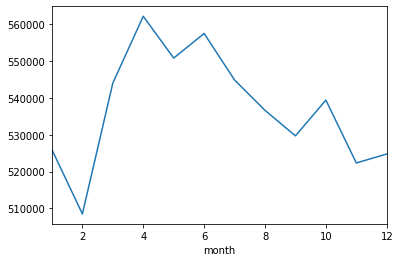

In [34]:
df.groupby('month').mean()['price'].plot()

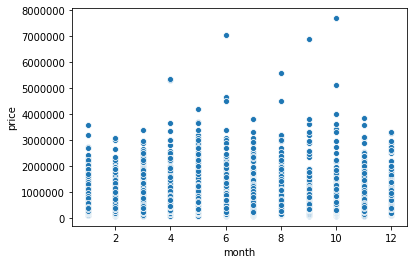

In [35]:
sns.scatterplot(x=df['month'],y=df['price'])

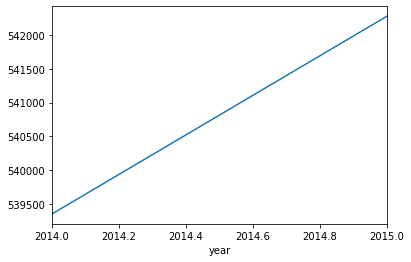

In [36]:
df.groupby('year').mean()['price'].plot()

In [37]:
## creating the model

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
# scaling the data

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
# to prevent data leakage fit only the test data
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train

array([[0.3       , 0.08      , 0.19855222, ..., 0.00657863, 0.72727273,
        0.        ],
       [0.2       , 0.28      , 0.1302999 , ..., 0.00288289, 0.45454545,
        0.        ],
       [0.3       , 0.48      , 0.25646329, ..., 0.00588823, 0.36363636,
        1.        ],
       ...,
       [0.1       , 0.2       , 0.14788004, ..., 0.00786147, 0.27272727,
        1.        ],
       [0.2       , 0.24      , 0.11685626, ..., 0.01557367, 0.27272727,
        1.        ],
       [0.1       , 0.08      , 0.08169597, ..., 0.00515118, 0.        ,
        1.        ]])

In [46]:
## training

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
model = Sequential()

In [49]:
# create 19 neurons per layer to represent each feature column
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [50]:
# validation data is used to check the performance of model after each epoch by comparing with test data
# validation data will not update the weights
# for large amount of data use batch size in power of 2
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 57us/sample - loss: 430238484793.6284 - val_loss: 418911640487.5062
Epoch 2/400
15117/15117 [==============================] - 0s 14us/sample - loss: 429220105654.4700 - val_loss: 415415945554.8049
Epoch 3/400
15117/15117 [==============================] - 0s 14us/sample - loss: 415478905326.8961 - val_loss: 384336942016.7901
Epoch 4/400
15117/15117 [==============================] - 0s 14us/sample - loss: 349095654260.1204 - val_loss: 276314044724.4642
Epoch 5/400
15117/15117 [==============================] - 0s 14us/sample - loss: 208062211982.0642 - val_loss: 131687219665.2247
Epoch 6/400
15117/15117 [==============================] - 0s 14us/sample - loss: 110115798467.7468 - val_loss: 95688285631.5259
Epoch 7/400
15117/15117 [==============================] - 0s 15us/sample - loss: 97926080628.1035 - val_loss: 93975615917.8272
Epoch 8/400
15117/15117 [===================

15117/15117 [==============================] - 0s 14us/sample - loss: 39784030272.7578 - val_loss: 38526980940.4839
Epoch 65/400
15117/15117 [==============================] - 0s 14us/sample - loss: 39491602749.6927 - val_loss: 38227902797.7481
Epoch 66/400
15117/15117 [==============================] - 0s 21us/sample - loss: 39244990964.4506 - val_loss: 37943449711.2494
Epoch 67/400
15117/15117 [==============================] - 0s 15us/sample - loss: 38956077845.0158 - val_loss: 37686707435.1407
Epoch 68/400
15117/15117 [==============================] - 0s 14us/sample - loss: 38774316137.7395 - val_loss: 37426488929.3432
Epoch 69/400
15117/15117 [==============================] - 0s 14us/sample - loss: 38450106729.7226 - val_loss: 37238624534.1235
Epoch 70/400
15117/15117 [==============================] - 0s 15us/sample - loss: 38244292984.4895 - val_loss: 36974152676.1877
Epoch 71/400
15117/15117 [==============================] - 0s 14us/sample - loss: 38040120450.0914 - val_loss

15117/15117 [==============================] - 0s 17us/sample - loss: 33304543802.4920 - val_loss: 31823354983.6642
Epoch 128/400
15117/15117 [==============================] - 0s 15us/sample - loss: 33240458210.6693 - val_loss: 31837563537.3827
Epoch 129/400
15117/15117 [==============================] - 0s 16us/sample - loss: 33257919454.2325 - val_loss: 31798277269.1753
Epoch 130/400
15117/15117 [==============================] - 0s 16us/sample - loss: 33228786579.5510 - val_loss: 31706958982.0049
Epoch 131/400
15117/15117 [==============================] - 0s 15us/sample - loss: 33204404696.2715 - val_loss: 31640177110.2815
Epoch 132/400
15117/15117 [==============================] - 0s 14us/sample - loss: 33155889449.6421 - val_loss: 31645644304.4346
Epoch 133/400
15117/15117 [==============================] - 0s 14us/sample - loss: 33103665492.9946 - val_loss: 31557406826.1926
Epoch 134/400
15117/15117 [==============================] - 0s 14us/sample - loss: 33082135580.1114 - v

15117/15117 [==============================] - 0s 15us/sample - loss: 31756436529.7199 - val_loss: 29969199771.4963
Epoch 191/400
15117/15117 [==============================] - 0s 14us/sample - loss: 31728712214.1843 - val_loss: 30006210489.2049
Epoch 192/400
15117/15117 [==============================] - 0s 14us/sample - loss: 31747667246.0451 - val_loss: 29924008006.7951
Epoch 193/400
15117/15117 [==============================] - 0s 15us/sample - loss: 31693898436.8137 - val_loss: 29888665023.5259
Epoch 194/400
15117/15117 [==============================] - 0s 18us/sample - loss: 31708196575.1639 - val_loss: 29854501293.8272
Epoch 195/400
15117/15117 [==============================] - 0s 16us/sample - loss: 31697357133.8144 - val_loss: 29842805024.2370
Epoch 196/400
15117/15117 [==============================] - 0s 14us/sample - loss: 31693365120.1101 - val_loss: 29850019116.8790
Epoch 197/400
15117/15117 [==============================] - 0s 14us/sample - loss: 31638320712.6493 - v

15117/15117 [==============================] - 0s 14us/sample - loss: 30880145527.3549 - val_loss: 28914680627.2000
Epoch 254/400
15117/15117 [==============================] - 0s 19us/sample - loss: 30883714075.0276 - val_loss: 28872569711.8815
Epoch 255/400
15117/15117 [==============================] - 0s 19us/sample - loss: 30872876086.3939 - val_loss: 28839595890.4099
Epoch 256/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30855440671.8878 - val_loss: 28873355243.7728
Epoch 257/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30873475747.3509 - val_loss: 28849862934.1235
Epoch 258/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30839297700.9089 - val_loss: 28829800614.8741
Epoch 259/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30892279043.1329 - val_loss: 28894642833.3827
Epoch 260/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30811140160.6223 - v

15117/15117 [==============================] - 0s 14us/sample - loss: 30223504741.0486 - val_loss: 28034414222.8543
Epoch 317/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30184667317.2677 - val_loss: 28029590166.4395
Epoch 318/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30178912567.7317 - val_loss: 28018824528.2765
Epoch 319/400
15117/15117 [==============================] - 0s 19us/sample - loss: 30203947439.9672 - val_loss: 27994568061.7877
Epoch 320/400
15117/15117 [==============================] - 0s 14us/sample - loss: 30151571054.5828 - val_loss: 28107905180.7605
Epoch 321/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30144880922.1978 - val_loss: 27965865195.1407
Epoch 322/400
15117/15117 [==============================] - 0s 13us/sample - loss: 30170189482.3280 - val_loss: 28044325834.9037
Epoch 323/400
15117/15117 [==============================] - 0s 19us/sample - loss: 30188281168.7271 - v

15117/15117 [==============================] - 0s 14us/sample - loss: 29595900013.5328 - val_loss: 27341263151.4074
Epoch 380/400
15117/15117 [==============================] - 0s 13us/sample - loss: 29592069171.0069 - val_loss: 27314663034.6272
Epoch 381/400
15117/15117 [==============================] - 0s 15us/sample - loss: 29597200903.4173 - val_loss: 27292686791.1111
Epoch 382/400
15117/15117 [==============================] - 0s 14us/sample - loss: 29550248995.4271 - val_loss: 27266088626.2519
Epoch 383/400
15117/15117 [==============================] - 0s 14us/sample - loss: 29571134452.2813 - val_loss: 27289479875.9506
Epoch 384/400
15117/15117 [==============================] - 0s 13us/sample - loss: 29602837081.8549 - val_loss: 27256767758.5383
Epoch 385/400
15117/15117 [==============================] - 0s 14us/sample - loss: 29548703292.9983 - val_loss: 27228955878.0840
Epoch 386/400
15117/15117 [==============================] - 0s 14us/sample - loss: 29533749979.2350 - v

In [51]:
model.history.history

{'loss': [430238484793.62836,
  429220105654.4701,
  415478905326.89606,
  349095654260.1204,
  208062211982.06418,
  110115798467.74678,
  97926080628.10345,
  96343192905.68234,
  94798095199.52795,
  93218831081.25687,
  91584024036.53212,
  89923885319.50201,
  88232035585.60878,
  86417077057.65535,
  84626572486.81194,
  82734337188.8073,
  80759954945.38864,
  78766270244.52788,
  76628080587.8415,
  74451173806.13826,
  72148317480.3551,
  69863900911.82748,
  67533577083.30065,
  65224978243.68751,
  62995378573.35291,
  60843483236.7946,
  58866303367.662895,
  57066229576.70014,
  55508727806.23881,
  54194897357.43335,
  53022341987.72772,
  51990006866.776215,
  51189888982.408676,
  50558643903.25911,
  49938670928.52391,
  49363252488.382614,
  48860274542.498116,
  48397601656.32017,
  47935575534.35417,
  47524284346.229546,
  47121977718.86379,
  46717261590.84474,
  46349644767.41788,
  45948088318.103325,
  45595595996.48819,
  45257142759.64808,
  44924574327.18555

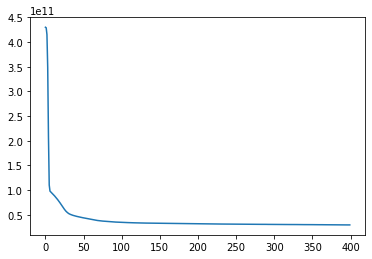

In [52]:
sns.lineplot(x=range(len(model.history.history['loss'])),y=model.history.history['loss'])

In [53]:
## model evaluation
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302385e+11,4.189116e+11
1,4.292201e+11,4.154159e+11
2,4.154789e+11,3.843369e+11
3,3.490957e+11,2.763140e+11
4,2.080622e+11,1.316872e+11
...,...,...
395,2.943126e+10,2.740282e+10
396,2.939512e+10,2.712003e+10
397,2.941242e+10,2.708745e+10
398,2.939638e+10,2.714816e+10


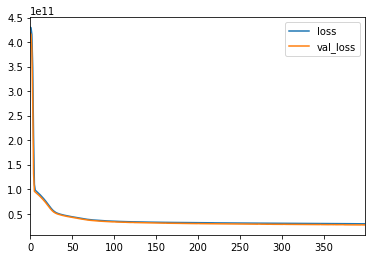

In [55]:
pd.DataFrame(model.history.history).plot()

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [58]:
y_pred = model.predict(X_test)

In [59]:
mean_squared_error(y_test,y_pred)

27107484206.367092

In [60]:
mean_absolute_error(y_test,y_pred)

101813.9915979456

In [61]:
# score of 1 is perfect
explained_variance_score(y_test,y_pred)

0.7957325252037402

In [64]:
y_df = pd.DataFrame(y_test)

In [67]:
y_df = pd.concat([y_df,pd.DataFrame(y_pred)],axis=1)

In [69]:
y_df.columns=['y_test','y_pred']

In [70]:
y_df

,y_test,y_pred
0,319000.0,407016.968750
1,464625.0,600064.062500
2,489950.0,565694.812500
3,395000.0,406341.750000
4,458000.0,457331.406250
...,...,...
6475,585000.0,652054.812500
6476,132825.0,236229.921875
6477,422500.0,377567.562500
6478,435000.0,565399.125000


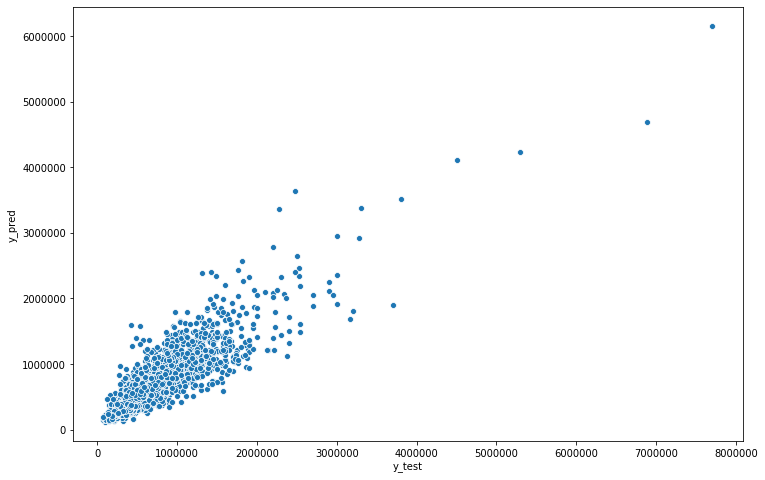

In [73]:
#our model prediction price vs the actual price
plt.figure(figsize=(12,8))
sns.scatterplot(x=y_df['y_test'],y=y_df['y_pred'])

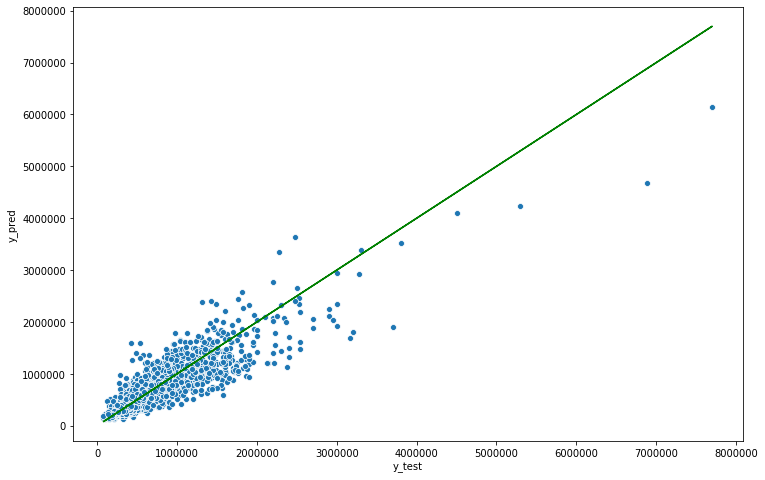

In [76]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=y_df['y_test'],y=y_df['y_pred'])
# the green line shows the perfect prediction 
plt.plot(y_test,y_test,'g')

In [77]:
# predicting new values

In [78]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [82]:
new_house = df.iloc[1]

In [86]:
new_house.values

array([ 5.38000e+05,  3.00000e+00,  2.25000e+00,  2.57000e+03,
        7.24200e+03,  2.00000e+00,  0.00000e+00,  0.00000e+00,
        3.00000e+00,  7.00000e+00,  2.17000e+03,  4.00000e+02,
        1.95100e+03,  1.99100e+03,  4.77210e+01, -1.22319e+02,
        1.69000e+03,  7.63900e+03,  1.20000e+01,  2.01400e+03])

In [87]:
# to create the X label data without price(y)
new_house.values[1:]

array([ 3.00000e+00,  2.25000e+00,  2.57000e+03,  7.24200e+03,
        2.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  2.17000e+03,  4.00000e+02,  1.95100e+03,
        1.99100e+03,  4.77210e+01, -1.22319e+02,  1.69000e+03,
        7.63900e+03,  1.20000e+01,  2.01400e+03])

In [89]:
#reshape to 2d array for transformation
new_house.values[1:].shape

(19,)

In [91]:
# use -1 to reshape into 2d array if no cols present
hnew = new_house.values[1:].reshape(-1,19)

In [92]:
hnew

array([[ 3.00000e+00,  2.25000e+00,  2.57000e+03,  7.24200e+03,
         2.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  2.17000e+03,  4.00000e+02,  1.95100e+03,
         1.99100e+03,  4.77210e+01, -1.22319e+02,  1.69000e+03,
         7.63900e+03,  1.20000e+01,  2.01400e+03]])

In [93]:
hnew = scaler.transform(hnew)

In [94]:
hnew

array([[0.2       , 0.28      , 0.22750776, 0.00407187, 0.4       ,
        0.        , 0.        , 0.5       , 0.4       , 0.23968043,
        0.08298755, 0.44347826, 0.98808933, 0.90895931, 0.16611296,
        0.22216486, 0.0081402 , 1.        , 0.        ]])

In [95]:
model.predict(hnew)

array([[639649.56]], dtype=float32)

In [99]:
df.iloc[1]

price            538000.000
bedrooms              3.000
bathrooms             2.250
sqft_living        2570.000
sqft_lot           7242.000
floors                2.000
waterfront            0.000
view                  0.000
condition             3.000
grade                 7.000
sqft_above         2170.000
sqft_basement       400.000
yr_built           1951.000
yr_renovated       1991.000
lat                  47.721
long               -122.319
sqft_living15      1690.000
sqft_lot15         7639.000
month                12.000
year               2014.000
Name: 1, dtype: float64

In [100]:
# diff of 100k from actual price
#could be improved by training on more epochs as there is no overftting

In [101]:
model.save('ps2_mod.h5')